In [1]:
import matplotlib.pylab as plt
import pandas as pd
# % matplotlib inline

# Data Analysis of Bike Sharing Dataset

In [2]:
# loading of original dataset
data = pd.read_csv('data/uci/hour.csv', error_bad_lines=False)
data = data.set_index('instant')
data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Find [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset) the description of dataset

## Hypotheses
1. Does the day of week affect the number of rental bikes?
2. Does a month affect the number of rental bikes?
3. Do holidays affect the number of rental bikes?
4. Do weather parameters affect the number of rental bikes?

##### 1. Does the day of week affect the number of rental bikes?

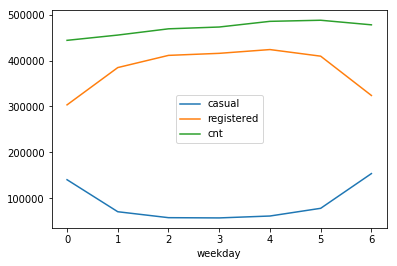

In [3]:
data[['weekday','casual','registered','cnt']].groupby(['weekday']).sum().plot()
plt.show()

##### 2. Does a month affect the number of rental bikes?

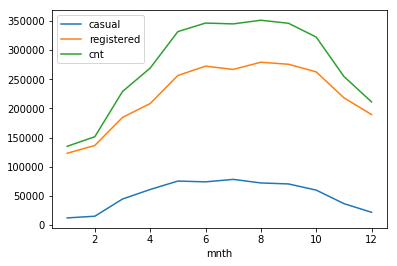

In [4]:
data[['mnth','casual','registered','cnt']].groupby(['mnth']).sum().plot()
plt.show()

##### 3. Do holidays affect the number of rental bikes?

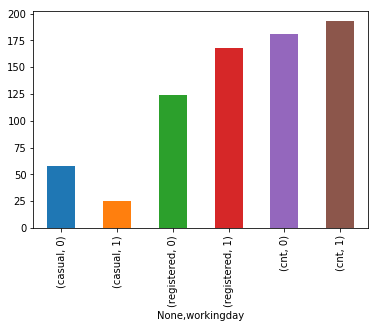

In [9]:
data[['workingday','casual','registered','cnt']].groupby(['workingday']).mean().unstack('workingday').plot.bar()
plt.show()

##### 4. Do weather parameters affect the number of rental bikes?

In [6]:
d = data[['mnth','windspeed','hum','temp','cnt']].groupby(['mnth']).mean().reset_index()
d.corr()

,mnth,windspeed,hum,temp,cnt
mnth,1.000000,-0.738207,0.651254,0.245156,0.453369
windspeed,-0.738207,1.000000,-0.656248,-0.564438,-0.617172
hum,0.651254,-0.656248,1.000000,0.235164,0.465380
temp,0.245156,-0.564438,0.235164,1.000000,0.927416
cnt,0.453369,-0.617172,0.465380,0.927416,1.000000


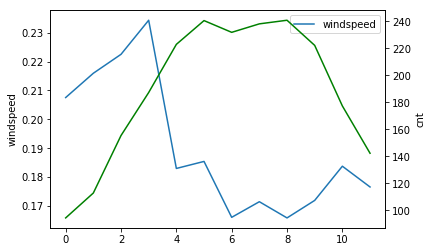

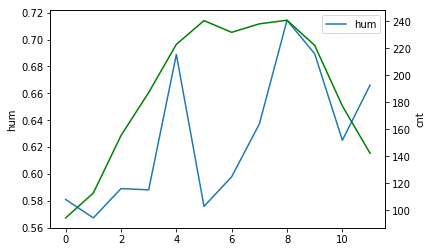

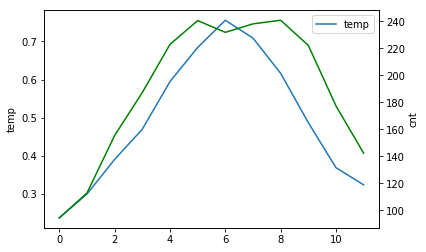

In [7]:
# windspeed

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
d.plot(ax=ax1, y='windspeed')
d.plot(ax=ax2, y='cnt', legend=False, color='g')
ax1.set_ylabel('windspeed')
ax2.set_ylabel('cnt')
plt.show()

# hum

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
d.plot(ax=ax1, y='hum')
d.plot(ax=ax2, y='cnt', legend=False, color='g')
ax1.set_ylabel('hum')
ax2.set_ylabel('cnt')
plt.show()

# temp

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
d.plot(ax=ax1, y='temp')
d.plot(ax=ax2, y='cnt', legend=False, color='g')
ax1.set_ylabel('temp')
ax2.set_ylabel('cnt')
plt.show()

## Findings
1. The temperature has correlation with the number of rentals. The higher temperature, the more propability a bike to be rented.
2. Humidity has some correlation. It's not a big correlation, so can be used optionally if shows effect during model validation.
3. Windspeed has inverse correlation. The smaller wind the more propability a bike to be rented.
4. Casual customers rent more on holodays and weekends. Registered - more on working days.
5. During warm months rent proability is higher.

### Fetures
1. mnth
2. weekday
3. workingday
4. temp
5. hum
6. windspeed